# Synthetic Psychologist

In [39]:
import numpy as np
import scipy.optimize
import matplotlib.pyplot as plt
from scipy.special import expit

In [40]:
# Number of trials
n_trial = 1000

# Number of lottery/option per trial
n_option = 2

p = np.random.random(size=(n_option, n_trial))
x = np.random.random(size=(n_option, n_trial))

In [41]:
data = {
    "tau": 0.1,
    "n_trial": n_trial,
    "n_option": n_option,
    "p": p,
    "x": x,
}

In [42]:
EPS = np.finfo(float).eps

def objective(param, data):
    
    alpha, gamma = param
    
    p = data["p"]
    x = data["x"]
    tau = data["tau"]

    sp = np.exp(-(-np.log(p)) ** gamma)
    
    su = x ** (1 - alpha)
    
    seu = sp * su
    
    p_choice = np.exp(seu/tau)
    p_choice /= p_choice.sum(axis=0)
    
    #     lls = 0
    #     for i in range(n_option):
    #         lls += np.log(p_choice[i, y==i] + EPS).sum()
    
    reward = 0
    for i in range(n_trial):
        c = np.random.choice(np.arange(n_option), p=p_choice[:, i])
        reward += p[c, i] * x[c, i]
        
    return -reward

In [43]:
# Define bounds and an initial guess
bounds = (-1, 0.5), (0, None) 
init_guess = (0, 1,)

# Run the optimizer
res = scipy.optimize.minimize(
    fun=objective,
    x0=init_guess,
    bounds=bounds,
    args=(data, ))
res

      fun: -352.0313407908343
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 2.49798483e+08, -8.85927586e+07])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 81
      nit: 2
     njev: 27
   status: 0
  success: True
        x: array([1.61931520e-06, 9.99996761e-01])

A '[OptimizeResult](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.OptimizeResult.html#scipy.optimize.OptimizeResult)' is returned. It contains:
* `fun` (NumPy array): Value of objective function.
* `hess_inv` (object): Inverse of the objective function’s Hessian; may be an approximation. Not available for all solvers. The type of this attribute may be either np.ndarray or scipy.sparse.linalg.LinearOperator. Here, it is a scipy.sparse.linalg.LinearOperator.
* `jac` (NumPy array): Value of the Jacobian.
* `nfev` (int): Number of evaluations of the objective functions.
* `message` (str): Description of the cause of the termination.
* `nit` (int): Number of iterations performed by the optimizer.
* `njev` (int): Number of evaluations of the objective functions and of its Jacobian.
* `status` (int): Termination status of the optimizer. Its value depends on the underlying solver. Refer to message for details.
* `success` (bool): Whether or not the optimizer exited successfully.
* `x` (NumPy array): the solution of the optimization.

In [44]:
# Extract the best param and best value 
best_param = res.x
best_value = res.fun

print("Estimation parameters: ", best_param)
print("LLS: ", - best_value)

Estimation parameters:  [1.61931520e-06 9.99996761e-01]
LLS:  352.0313407908343


In [45]:
alpha_est, gamma_est = res.x

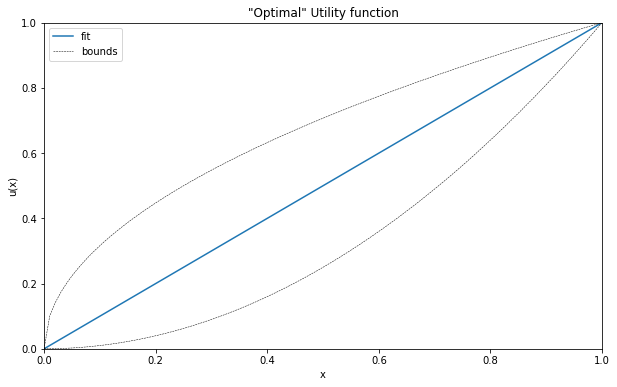

In [46]:
# Utility function
def f(x, alpha):
    return x**(1-alpha)

# Create fig
fig, ax = plt.subplots(figsize=(10, 6))

# Set limits
x_min, x_max = 0, 1
y_min, y_max = 0, 1

# Generate x-values
x = np.linspace(x_min, x_max, 100)

# Plot estimate
ax.plot(x, f(x, alpha_est), label="fit")

# Plot truth
# ax.plot(x, f(x, alpha_true), ls=':', label='true', color="red")

# Plot bounds
ax.plot(x, f(x, -1), color='0.01', ls='--', lw=0.5, label="bounds")
ax.plot(x, f(x, 0.5), color='0.01', ls='--', lw=0.5)

# Pimp your plot
ax.set_xlabel('x')
ax.set_ylabel('u(x)')
ax.set_title('"Optimal" Utility function')
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)
ax.legend()

plt.show()

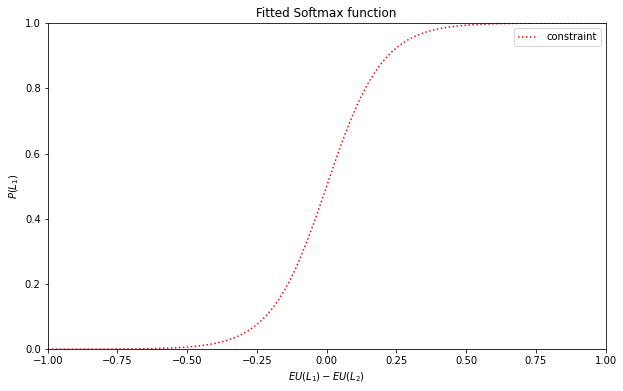

In [48]:
# Softmax function given the difference of value between 2 options
def f(x, tau):
    return expit(x/tau)

# Create fig
fig, ax = plt.subplots(figsize=(10, 6))

# Set limits
x_min, x_max = -1, 1
y_min, y_max = 0, 1

# Generate x-values
x = np.linspace(x_min, x_max, 100)

# Plot estimate
# ax.plot(x, f(x, tau_est), label="fit")

# Plot truth
ax.plot(x, f(x, data["tau"]), ls=':', label='constraint', color="red")

# Pimp your plot
ax.set_xlabel('$EU(L_1) - EU(L_2)$')
ax.set_ylabel('$P(L_1)$')
ax.set_title('Fitted Softmax function')
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)
ax.legend()

plt.show()

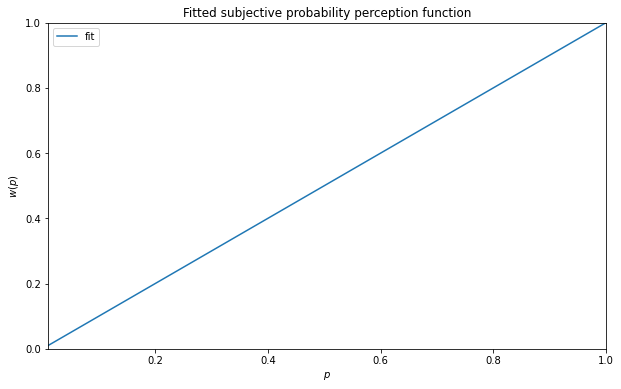

In [51]:
# Probability perception function
def f(x, gamma):
    return np.exp(-(-np.log(x)) ** gamma)

# Create fig
fig, ax = plt.subplots(figsize=(10, 6))

# Set limits
x_min, x_max = 0.01, 1
y_min, y_max = 0, 1

# Generate x-values
x = np.linspace(x_min, x_max, 100)

# Plot mean
ax.plot(x, f(x, gamma_est), label="fit")

# Plot truth
# ax.plot(x, f(x, gamma_true), ls=':', label='true', color="red")

# Pimp your plot
ax.set_xlabel('$p$')
ax.set_ylabel('$w(p)$')
ax.set_title('"Optimized" subjective probability perception function')
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)

ax.legend()
plt.show()